In [22]:
import pandas as pd
import numpy as np

In [23]:
CCTV_Seoul = pd.read_csv('C:\\Users\\dkdud\\Desktop\\CCTV_in_Seoul.csv', encoding = 'utf-8')

In [24]:
CCTV_Seoul.columns.values[0] = '구별'
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [25]:
pop_Seoul = pd.read_excel('C:\\Users\\dkdud\\Desktop\\population_in_Seoul.xls', header = 2, usecols = 'B, D, G, J, N', encoding = 'utf-8')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [26]:
pop_Seoul.rename(columns = {pop_Seoul.columns[0] : '구별',
                           pop_Seoul.columns[1] : '인구수',
                           pop_Seoul.columns[2] : '한국인',
                           pop_Seoul.columns[3] : '외국인',
                           pop_Seoul.columns[4] : '고령자'}, inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10049607,9765623,283984,1416131
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767


In [27]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,163026,153065,9961,26742
2,중구,135633,125725,9908,22005
3,용산구,245090,228999,16091,37640
4,성동구,316463,308221,8242,42767
5,광진구,371063,355559,15504,45619


In [29]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전'] * 100
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,150.619195
1,강동구,1010,379,99,155,377,166.490765
2,강북구,831,369,120,138,204,125.203252
3,강서구,911,388,258,184,81,134.793814
4,관악구,2109,846,260,390,613,149.290780


In [30]:
del CCTV_Seoul['2013년도 이전']
del CCTV_Seoul['2014년']
del CCTV_Seoul['2015년']
del CCTV_Seoul['2016년']
CCTV_Seoul.head()

,구별,소계,최근증가율
0,강남구,3238,150.619195
1,강동구,1010,166.490765
2,강북구,831,125.203252
3,강서구,911,134.793814
4,관악구,2109,149.290780


In [31]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자
0,강남구,3238,150.619195,547453,542364,5089,67085
1,강동구,1010,166.490765,431920,427573,4347,58770
2,강북구,831,125.203252,322915,319164,3751,58196
3,강서구,911,134.793814,603611,596949,6662,79660
4,관악구,2109,149.290780,520040,501957,18083,72249


In [32]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자
구별,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085
강동구,1010,166.490765,431920,427573,4347,58770
강북구,831,125.203252,322915,319164,3751,58196
강서구,911,134.793814,603611,596949,6662,79660
관악구,2109,149.290780,520040,501957,18083,72249


In [36]:
data_result['외국인비율'] = data_result['외국인'] / data_result['인구수'] * 100
data_result['고령자비율'] = data_result['고령자'] / data_result['인구수'] * 100
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020,544215
강동구,1010,166.490765,431920,427573,4347,58770,1.006436,13.606686,430910
강북구,831,125.203252,322915,319164,3751,58196,1.161606,18.022080,322084
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241,602700
관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970,517931


In [38]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.07336946e-03, 1.08384235e+03])

In [42]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

In [50]:
data_result['오차'] = np.abs(data_result['소계']-f1(data_result['인구수']))
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020,1566.538319
강동구,1010,166.490765,431920,427573,4347,58770,1.006436,13.606686,537.452088
강북구,831,125.203252,322915,319164,3751,58196,1.161606,18.022080,599.449450
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241,820.739963
관악구,2109,149.290780,520040,501957,18083,72249,3.477233,13.892970,466.962596


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False
if platform.system() == 'Darwin': #맥os 사용자
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':#윈도우 사용자
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [62]:
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
강남구,3238,150.619195,547453,542364,5089,67085,0.929578,12.254020,1566.538319
양천구,2482,34.671731,468145,464185,3960,58045,0.845892,12.398936,895.665104
강서구,911,134.793814,603611,596949,6662,79660,1.103691,13.197241,820.739963
용산구,2096,53.216374,245090,228999,16091,37640,6.565343,15.357624,749.085528
서초구,2297,63.371266,438163,433951,4212,54751,0.961286,12.495578,742.846867
송파구,1081,104.347826,673507,666635,6872,81364,1.020331,12.080647,725.764195
도봉구,825,246.638655,341649,339413,2236,55964,0.654473,16.380554,625.557953
중랑구,916,79.960707,408147,403209,4938,61830,1.209858,15.148954,605.934875
광진구,878,53.228621,371063,355559,15504,45619,4.178266,12.294139,604.130042


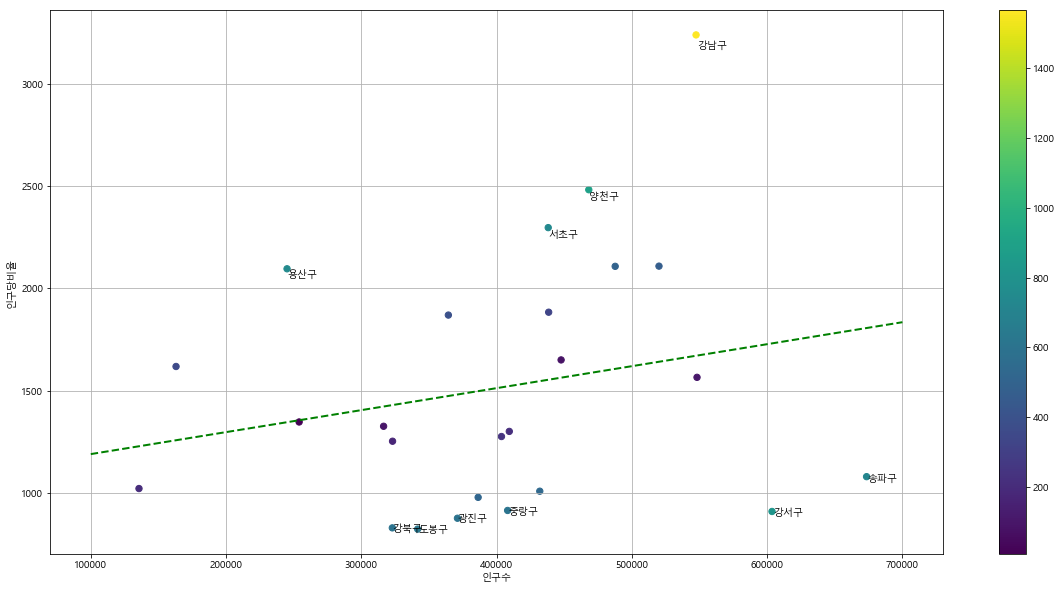

In [88]:
plt.figure(figsize=(20,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
           c = data_result['오차'], s=40)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 2, color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.001, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=10)
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()